In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Criar um DataFrame fictício com os dados
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tcc/netflix_titles.csv', header=0) 

# Aplicar a vetorização TF-IDF nas descrições -> processamento de linguagem natural
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['description'])

# Aplicar o algoritmo K-means
kmeans = KMeans(n_clusters=80 ,n_init=10, random_state=42)
kmeans.fit(X)

# Obter os rótulos de cluster
labels = kmeans.labels_

# Adicionar os rótulos de cluster ao DataFrame
df['cluster'] = labels

# Imprimir os resultados
# display(df[['title', 'description' ,'cluster']])
display(df[['title', 'description' ,'cluster']].sort_values(by='cluster', ascending=True))


,title,description,cluster
4900,Spiritual House,Psychic Hiroyuki Ehara leads various celebriti...,0
7540,My Life My Story,Host RJ Anmol conducts in-depth interviews wit...,0
1961,The Playbook,Coaches with championship résumés share their ...,0
2547,Have a Good Trip: Adventures in Psychedelics,Explore hallucinogenic highs and lows as celeb...,0
7083,Inst@famous,Self-made social media celebrities share the s...,0
...,...,...,...
7391,Man Up,"A single woman seizes an opportunity when, whi...",79
4479,Great News,A TV news producer's ambitions take an awkward...,79
6081,About a Boy,"Hip, irresponsible Londoner Will invents an im...",79
7383,Mahi Way,Though worried she's doomed to be single forev...,79


Esses resultados indicam que o algoritmo de clusterização K-means encontrou padrões nas descrições dos filmes/séries que permitiram agrupá-los em clusters distintos. Você pode explorar mais esses clusters e analisar as características dos filmes/séries em cada um deles para obter insights sobre os grupos formados.

##Elbow method (método do cotovelo)

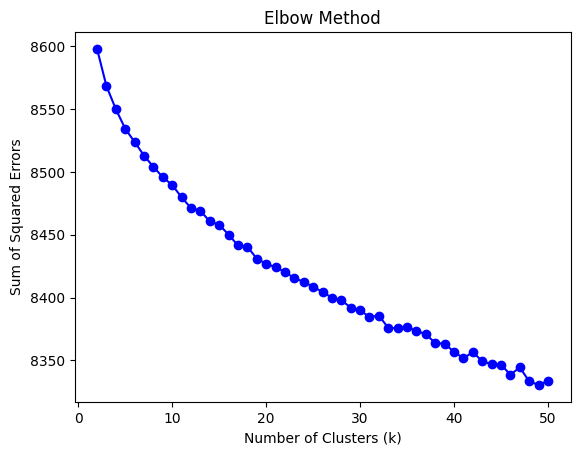

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Criar um DataFrame fictício com os dados
df = pd.read_csv('/netflix_titles.csv', header=0)  # Assuming the header is in the first row

# Reduzir o tamanho do dataset por subamostragem aleatória
sample_size = 1000
df_sample = df.sample(n=sample_size, random_state=42)

# Aplicar a vetorização TF-IDF nas descrições
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['description'])

# Perform K-means clustering for different values of k
k_values = range(2, 31)  # Test k from 2 to 10
sse = []  # Sum of squared errors

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, sse, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method')
plt.show()